In [150]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [151]:
Medi_df = pd.read_csv(r"C:\Users\adisr\Downloads\azcabgptca.csv")
Medi_df.head(10) 

,Unnamed: 0,died,procedure,age,gender,los,type
0,1,0,1,73,0,51,0
1,2,0,0,67,0,30,1
2,3,0,1,69,0,43,0
3,4,0,1,65,0,32,0
4,5,0,1,79,0,42,1
5,6,0,1,68,0,33,1
6,7,0,0,74,0,22,1
7,8,0,1,66,0,30,1
8,9,0,1,66,0,30,0
9,10,0,0,65,1,9,1


In [152]:
Medi_df.shape

(1959, 7)

In [153]:
Medi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1959 non-null   int64
 1   died        1959 non-null   int64
 2   procedure   1959 non-null   int64
 3   age         1959 non-null   int64
 4   gender      1959 non-null   int64
 5   los         1959 non-null   int64
 6   type        1959 non-null   int64
dtypes: int64(7)
memory usage: 107.3 KB


In [154]:
# capture the target column ("default") into separate vectors for training set and test set

X = Medi_df.drop(["Unnamed: 0"] , axis=1)

y = Medi_df.pop("died")


# TEST-TRAIN split

In [155]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

# Fitting Random Forest 

In [156]:
rfcl = RandomForestClassifier(n_estimators = 500, oob_score = True)

rfcl = rfcl.fit(X_train, train_labels)

In [157]:
rfcl.oob_score

True

In [158]:
rfcl.oob_score_

1.0

# Model verification ---(before grid search)

### Training data evaluation:- 

In [159]:
confusion_matrix(train_labels,ytrain_predict)

array([[1346,    0],
       [  25,    0]], dtype=int64)

In [160]:
print('Accuracy', ((1344+0)/(1344+27)))
print('Sensitivity',((1344/1344))) #TP/Actual yes
print('Specificity',(0/27)) #TN/Actual no
print('Precision',(1344/1371)) #TP/Predicted yes

Accuracy 0.9803063457330415
Sensitivity 1.0
Specificity 0.0
Precision 0.9803063457330415


In [161]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1346
           1       0.00      0.00      0.00        25

    accuracy                           0.98      1371
   macro avg       0.49      0.50      0.50      1371
weighted avg       0.96      0.98      0.97      1371



C:\Users\adisr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.858


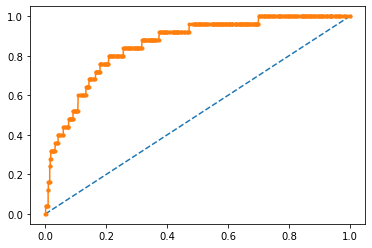

In [162]:
# predict probabilities
probs = best_grid.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

### Test data evaluation:-

In [163]:
confusion_matrix(test_labels,ytest_predict)

array([[577,   0],
       [ 11,   0]], dtype=int64)

In [164]:
print('Accuracy', ((579+0)/(579+9)))
print('Sensitivity/Recall',((577/577))) #TP/Actual yes
print('Specificity',(0/9)) #TN/Actual no
print('Precision',(577/(577+11))) #TP/Predicted yes

Accuracy 0.9846938775510204
Sensitivity/Recall 1.0
Specificity 0.0
Precision 0.9812925170068028


In [165]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       577
           1       0.00      0.00      0.00        11

    accuracy                           0.98       588
   macro avg       0.49      0.50      0.50       588
weighted avg       0.96      0.98      0.97       588



C:\Users\adisr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.877


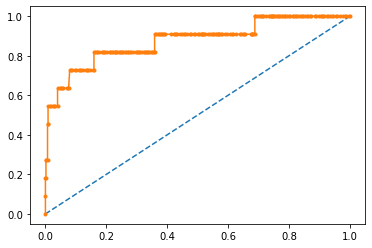

In [166]:
# predict probabilities
probs = best_grid.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()


# ------------ Grid Search -------------

max_depth = maximum level upto which the tree will grow. 
            So if max_depth = 10, then no decision tree will have more than 10 levels to it.
            However, it can have less than 10 levels.

        
max_features = out of all the independent variables available (excluding the target variable),
                it sets the number of features that can be used by the rfcl for evaluating and splitting the decision nodes
                and selects the best using the gini gain computation.

        
min_samples_leaf = sets the number of observation to be present in each of the terminal nodes of each decision tree in the RF.


min_samples_split = before each split occurs in a decision tree, 
                    we can check if so-and-so 
    
    # of obs are present in the node. Should be approximately 3X the size of min_sample_leaf.

    
n_estimators = number of trees to be constructed within the RF

#after setting the parameters, we can once again fit the model and calculate the oob score

In [113]:


param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl_grid = RandomForestClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = rfcl_grid, param_grid = param_grid, cv = 3)

In [114]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [115]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [116]:
best_grid = grid_search.best_estimator_

In [117]:
ytrain_predict_grid = best_grid.predict(X_train)
ytest_predict_grid = best_grid.predict(X_test)

In [118]:
#ytrain_predict_grid = best_grid.predict_proba(X_train)
#ytest_predict_grid = best_grid.predict_proba(X_test)

# Model Verification ---( After grid search)

### Train Dataset verification :

In [119]:
confusion_matrix(train_labels,ytrain_predict_grid)

array([[1344,    0],
       [  27,    0]], dtype=int64)

In [120]:
print('Accuracy', ((1344+0)/(1344+27)))
print('Sensitivity',((1344/1344))) #TP/Actual yes
print('Specificity',(0/27)) #TN/Actual no
print('Precision',(1344/1371)) #TP/Predicted yes

Accuracy 0.9803063457330415
Sensitivity 1.0
Specificity 0.0
Precision 0.9803063457330415


In [121]:
print(classification_report(train_labels,ytrain_predict_grid))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1344
           1       0.00      0.00      0.00        27

    accuracy                           0.98      1371
   macro avg       0.49      0.50      0.50      1371
weighted avg       0.96      0.98      0.97      1371



C:\Users\adisr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.902


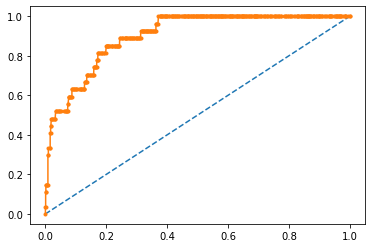

In [122]:
# predict probabilities
probs = best_grid.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

### Test Dataset verification :

In [123]:
confusion_matrix(test_labels,ytest_predict_grid)

array([[579,   0],
       [  9,   0]], dtype=int64)

In [124]:
print('Accuracy', ((579+0)/(579+9)))
print('Sensitivity',((579/579))) #TP/Actual yes
print('Specificity',(0/9)) #TN/Actual no
print('Precision',(579/(579+9))) #TP/Predicted yes

Accuracy 0.9846938775510204
Sensitivity 1.0
Specificity 0.0
Precision 0.9846938775510204


In [125]:
print(classification_report(test_labels,ytest_predict_grid))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       579
           1       0.00      0.00      0.00         9

    accuracy                           0.98       588
   macro avg       0.49      0.50      0.50       588
weighted avg       0.97      0.98      0.98       588



C:\Users\adisr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.749


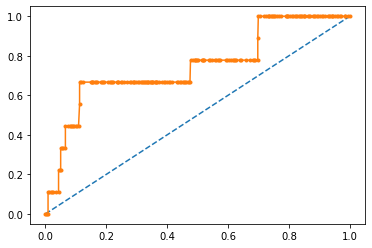

In [126]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()